In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


X_train,X_test = X_train/255.0,X_test/255.0

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print(X_train.shape)
print(X_test.shape)

y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)
print(y_test)
print(y_train)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


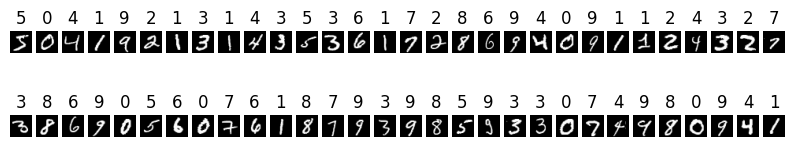

In [3]:
plt.figure(figsize=(10, 2))
for i in range(60):
    plt.subplot(2, 30, i+1)
    plt.imshow(X_train[i].squeeze(), cmap="gray")
    plt.title(f"{np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

In [4]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(64)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
pred = model.fit(train_dataset, validation_data=test_dataset, epochs=5)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8938 - loss: 0.3688 - val_accuracy: 0.9753 - val_loss: 0.0759
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9818 - loss: 0.0579 - val_accuracy: 0.9868 - val_loss: 0.0395
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9889 - loss: 0.0367 - val_accuracy: 0.9882 - val_loss: 0.0353
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9921 - loss: 0.0259 - val_accuracy: 0.9876 - val_loss: 0.0387
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9942 - loss: 0.0180 - val_accuracy: 0.9902 - val_loss: 0.0334


In [7]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9882 - loss: 0.0392
Test Accuracy: 0.9902


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


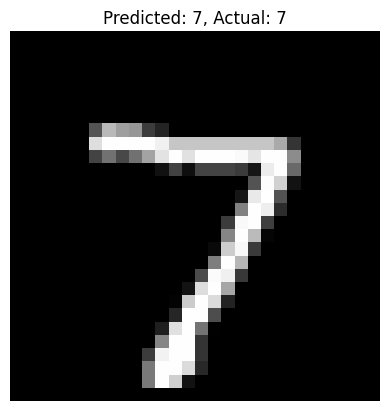

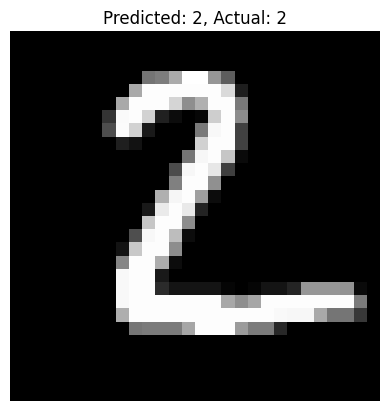

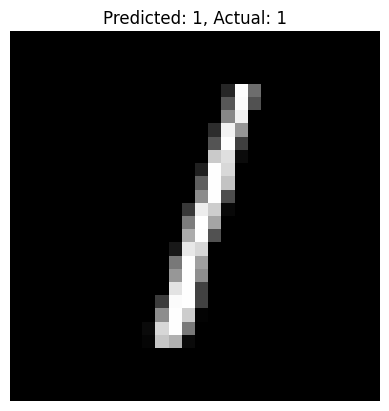

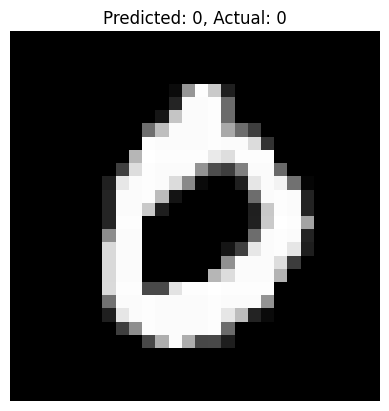

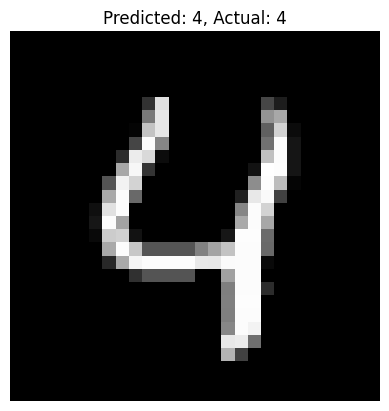

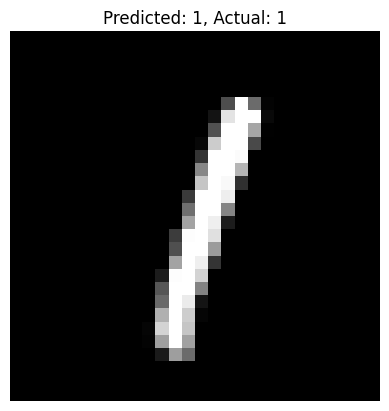

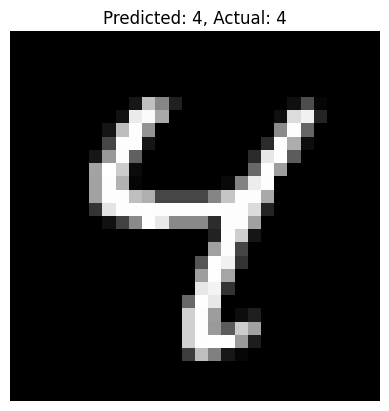

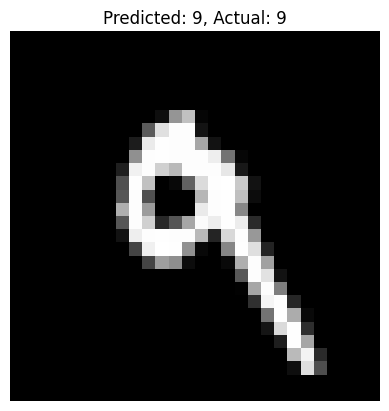

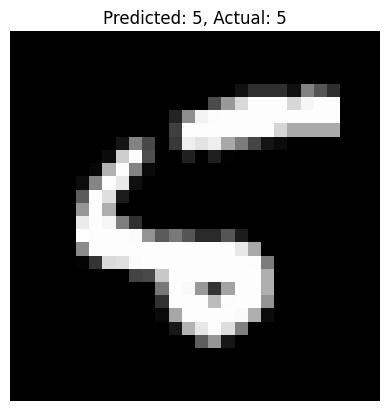

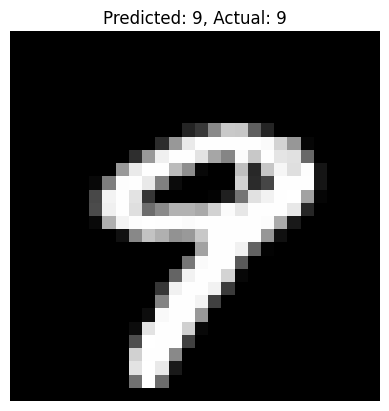

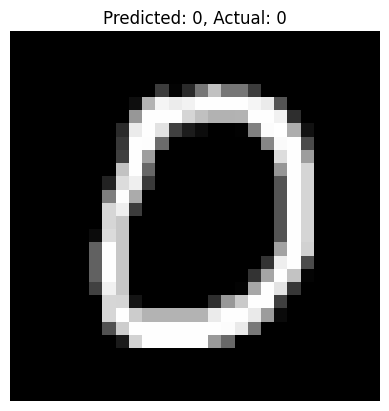

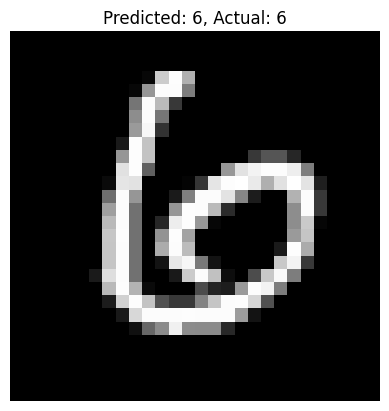

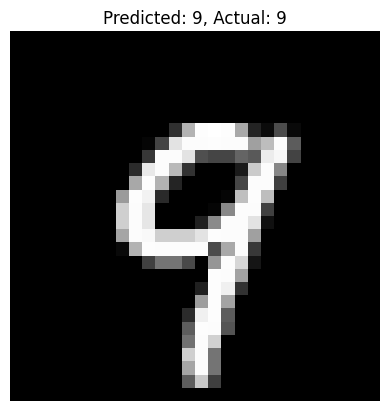

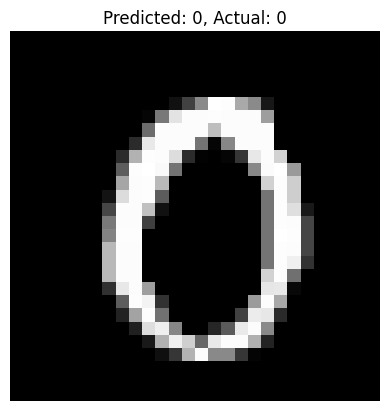

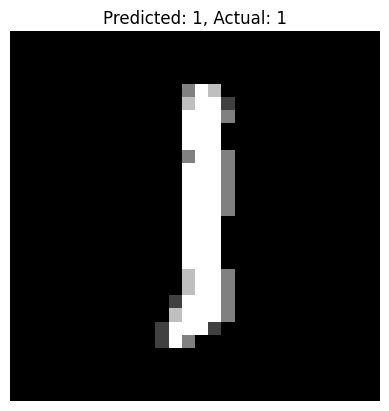

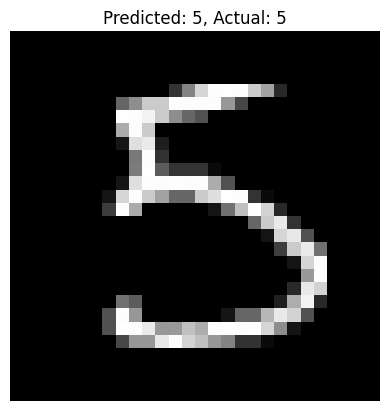

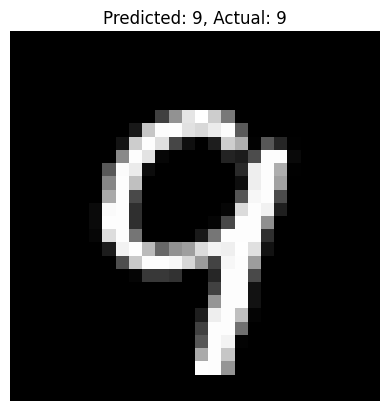

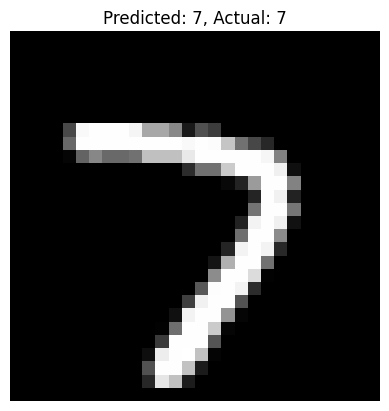

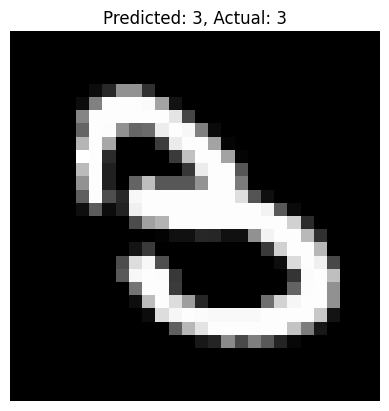

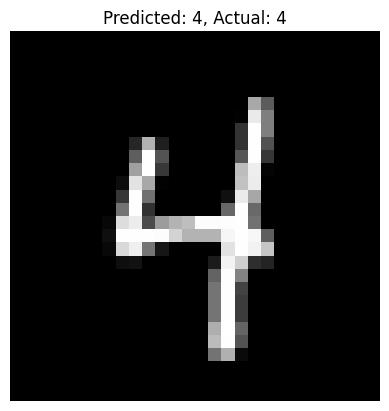

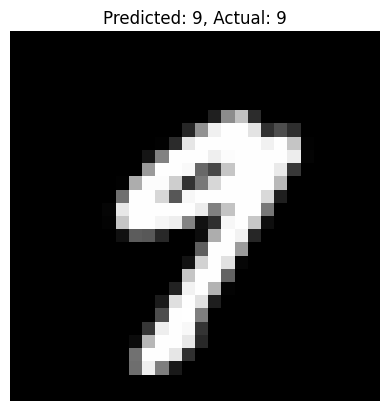

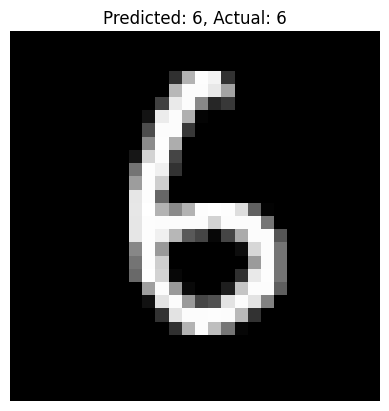

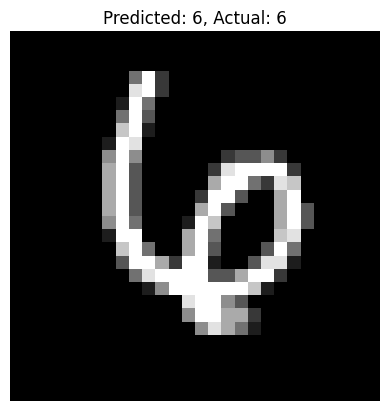

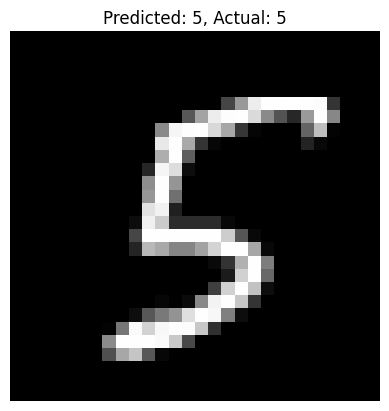

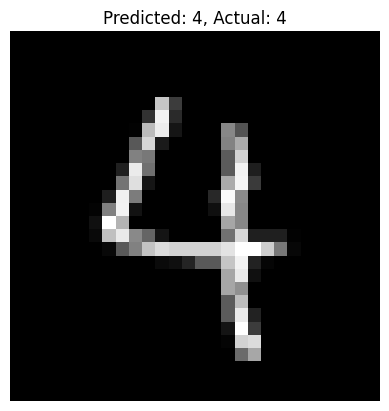

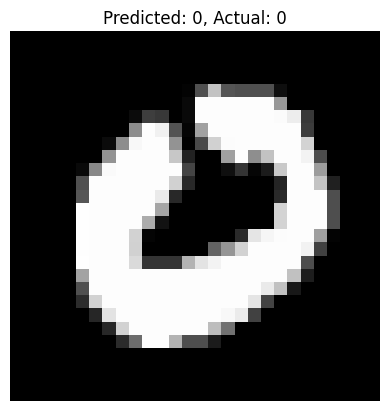

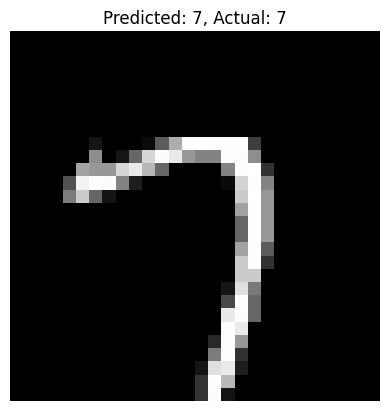

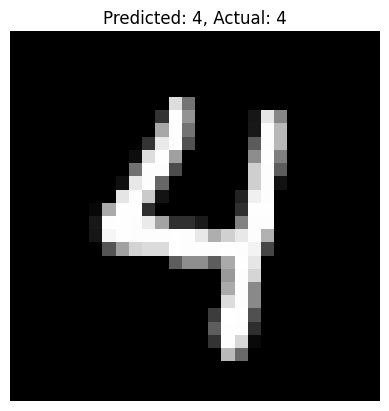

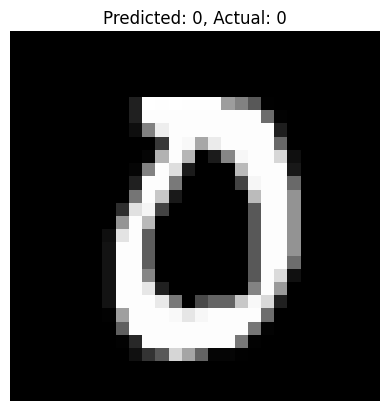

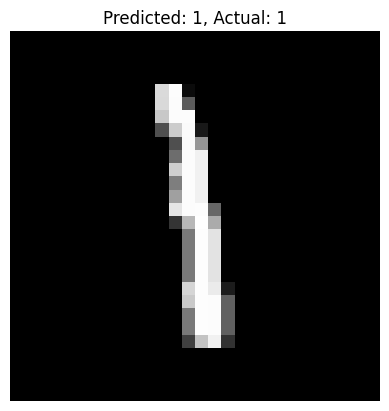

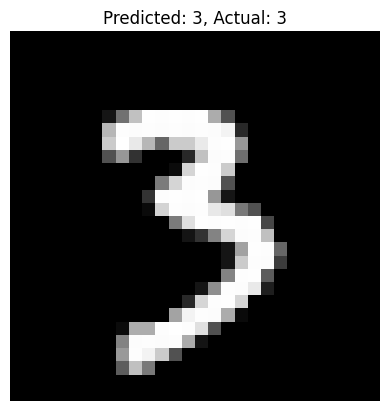

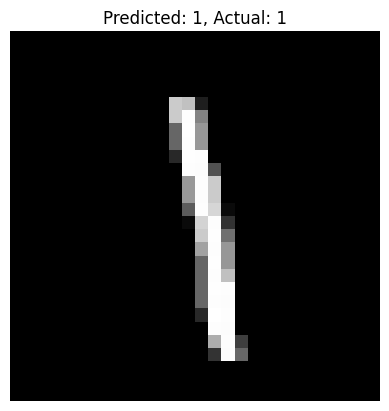

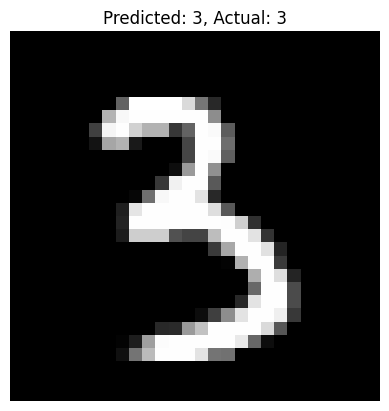

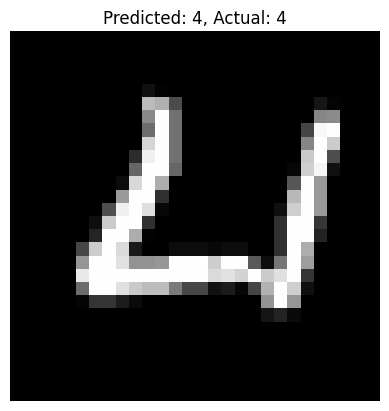

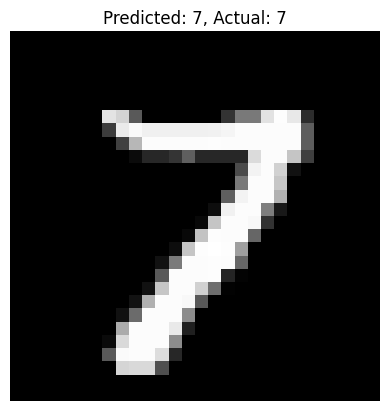

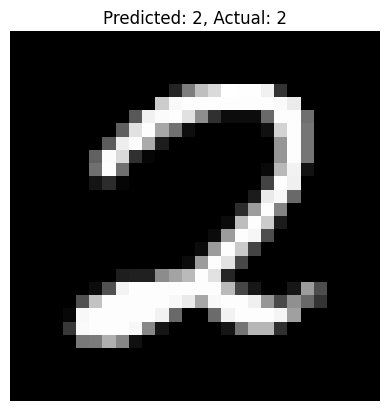

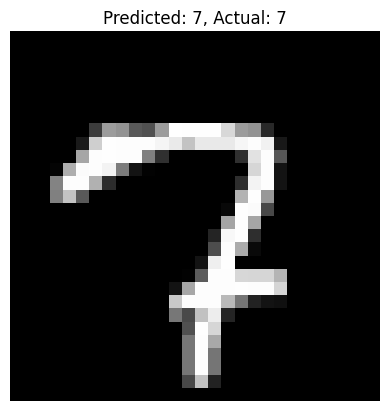

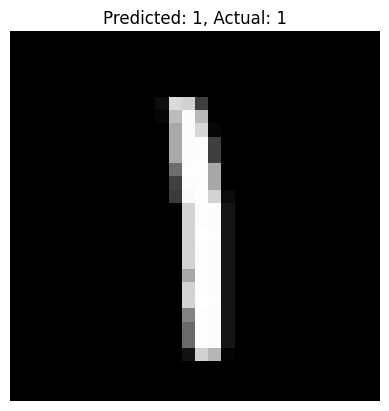

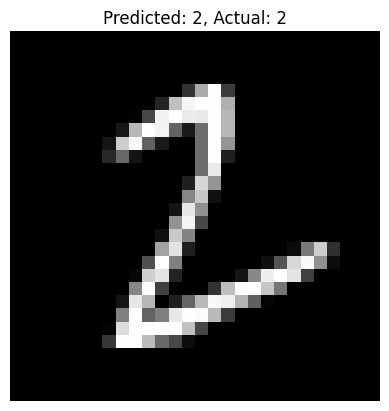

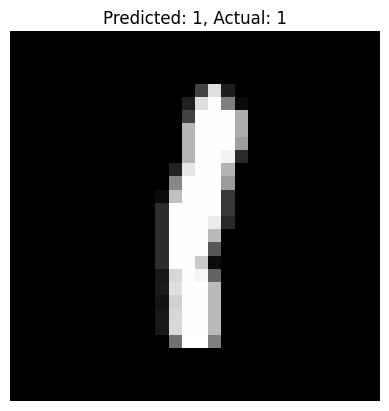

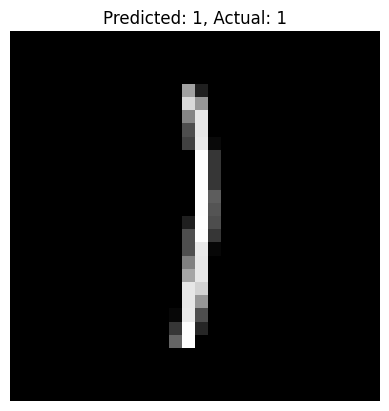

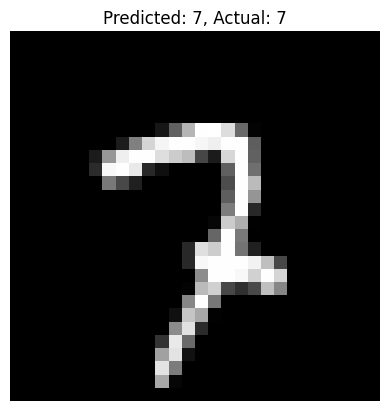

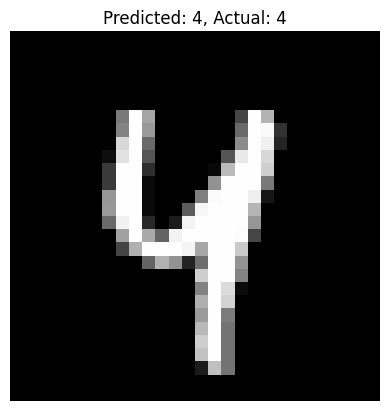

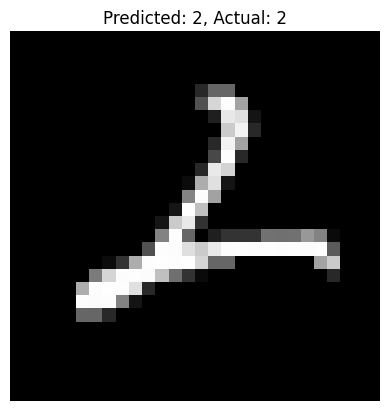

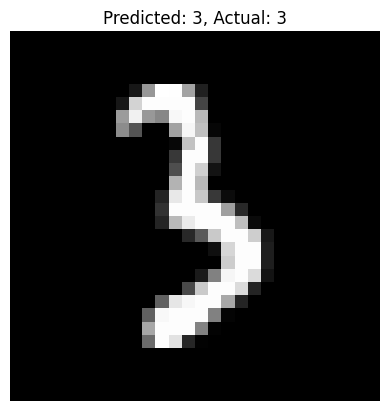

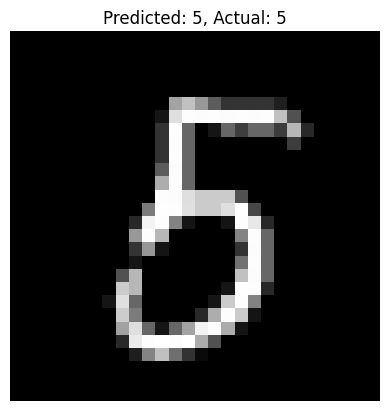

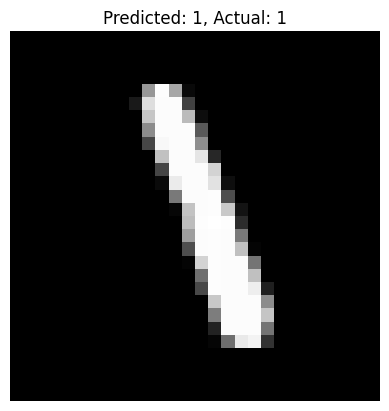

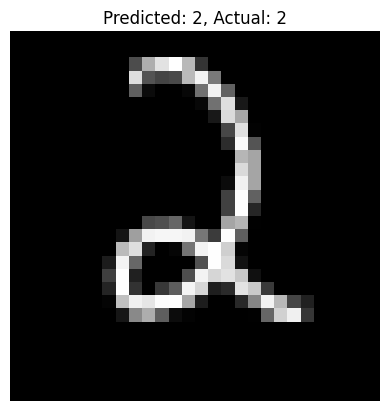

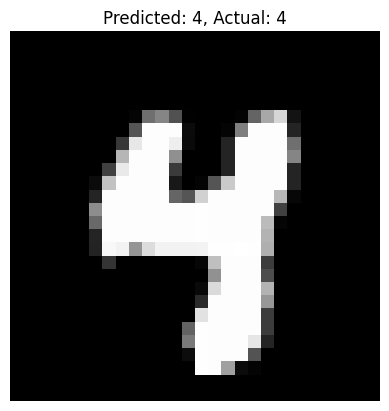

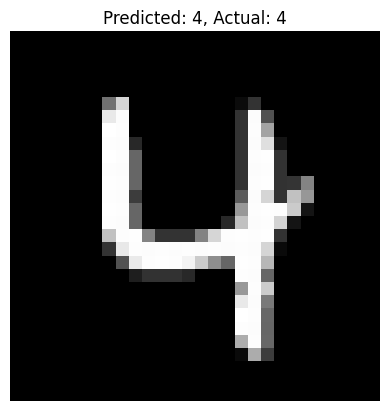

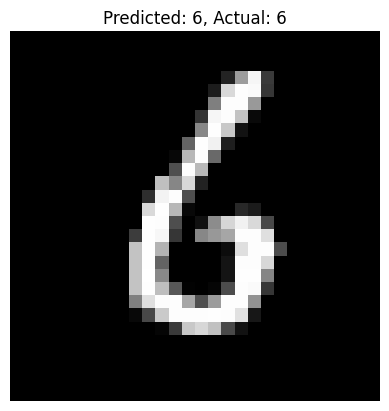

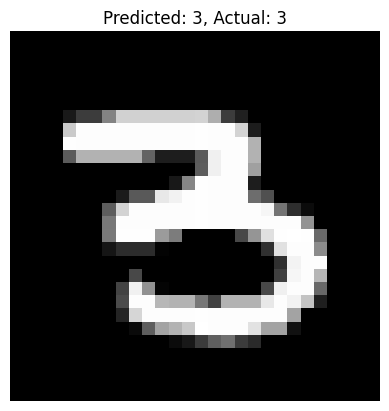

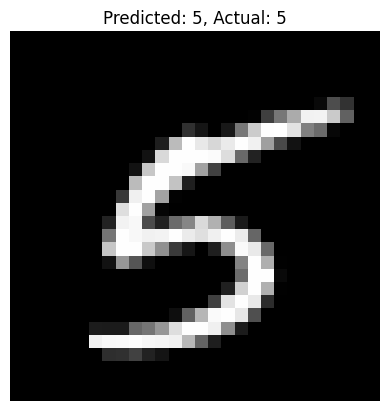

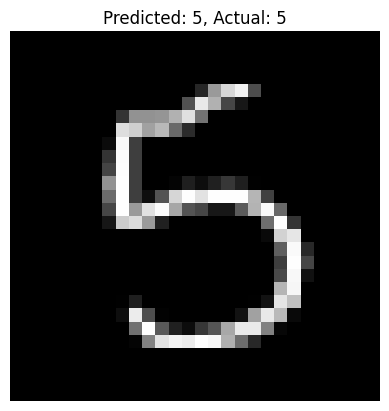

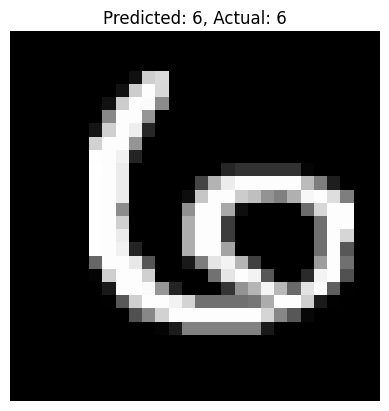

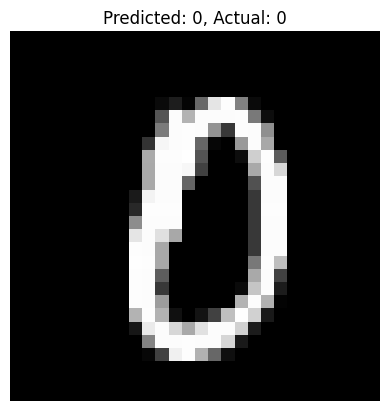

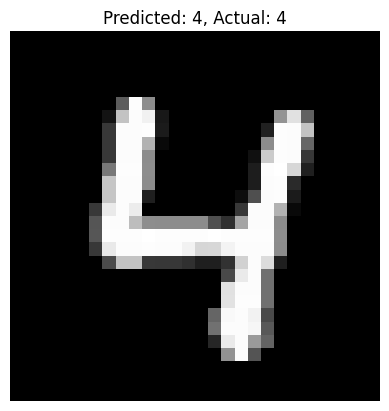

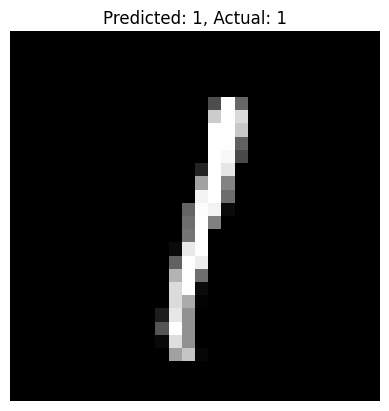

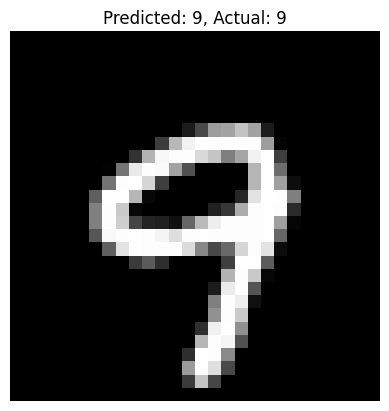

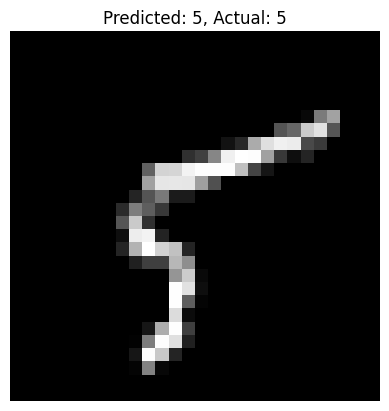

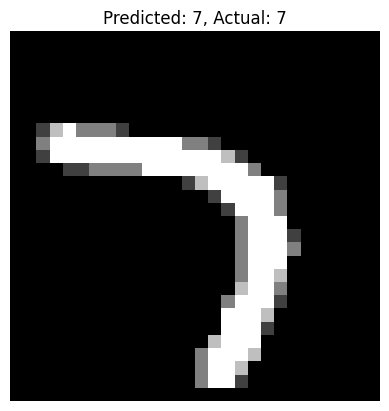

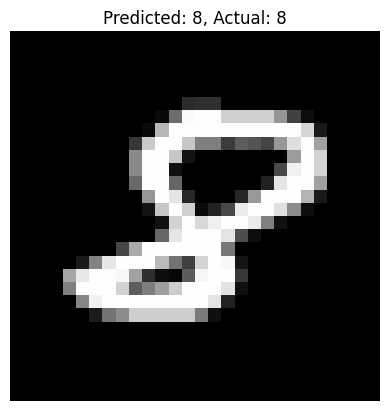

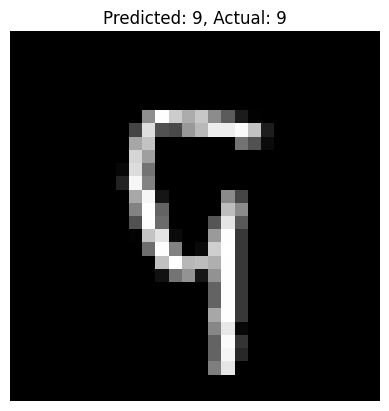

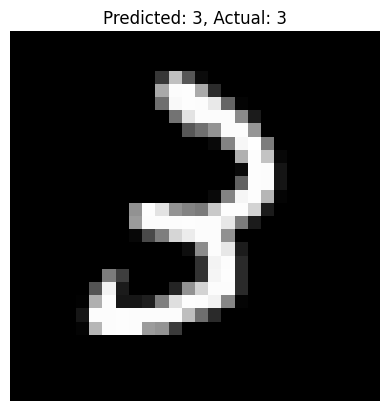

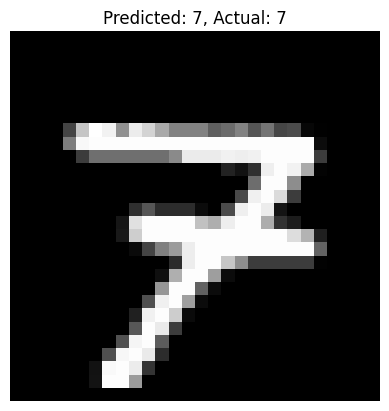

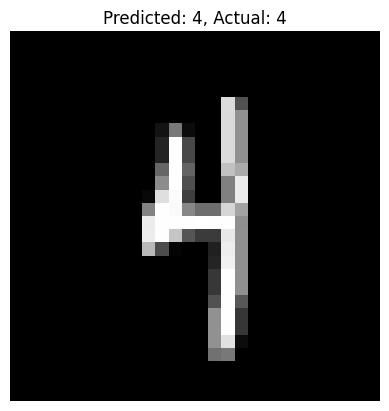

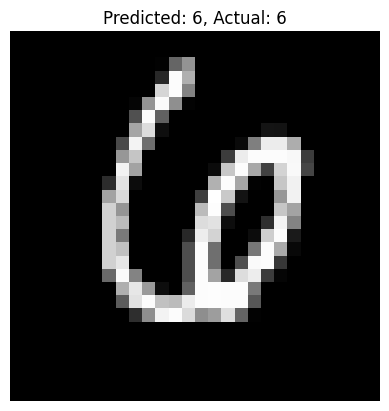

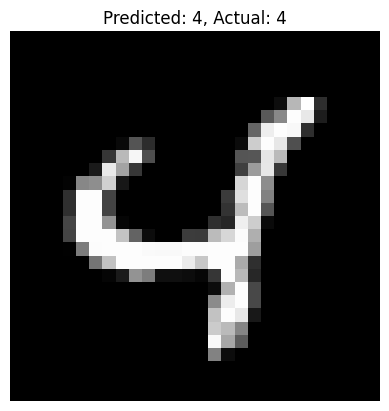

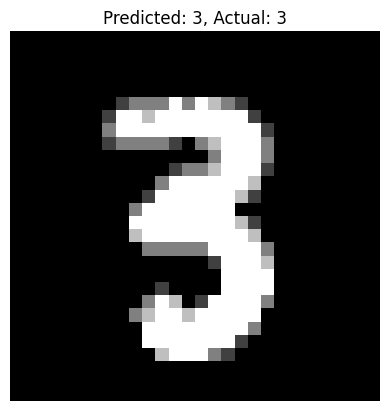

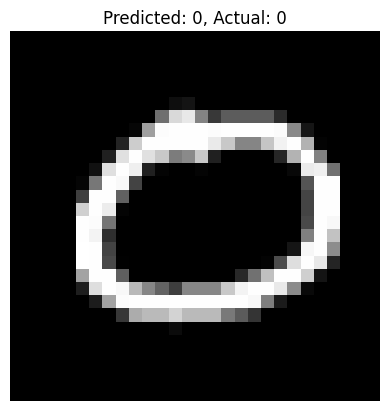

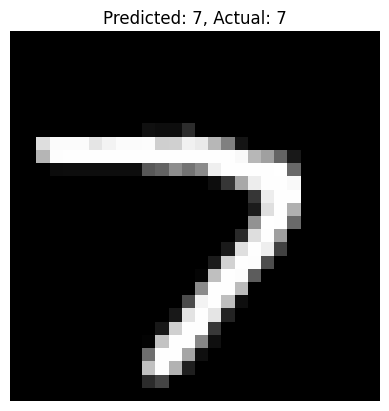

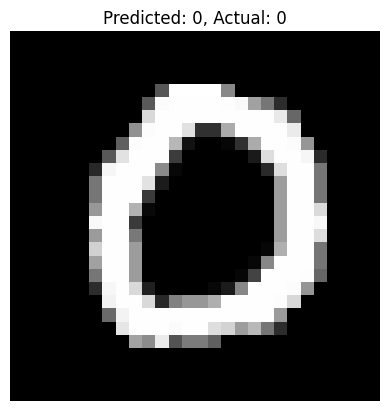

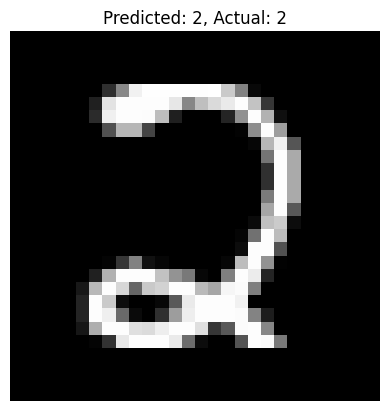

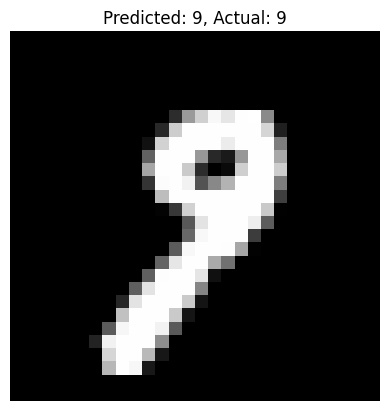

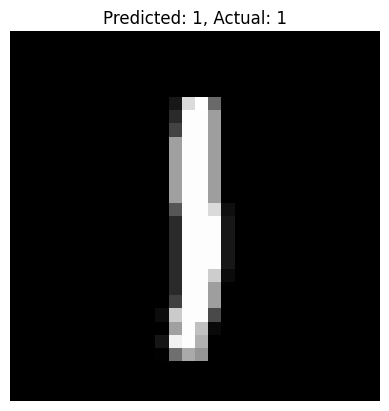

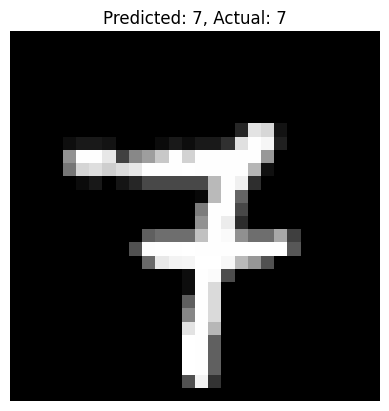

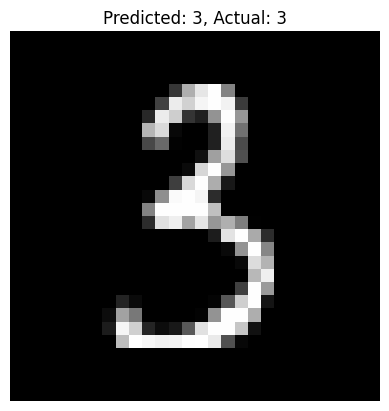

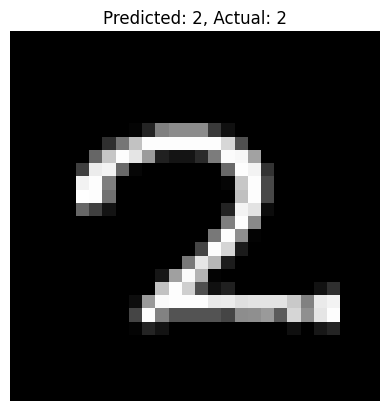

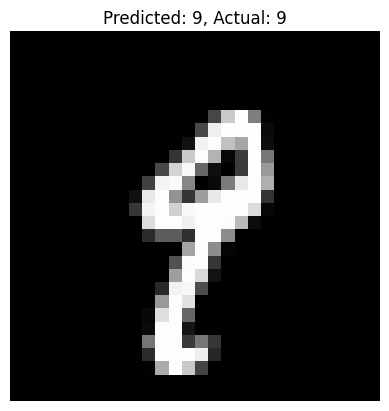

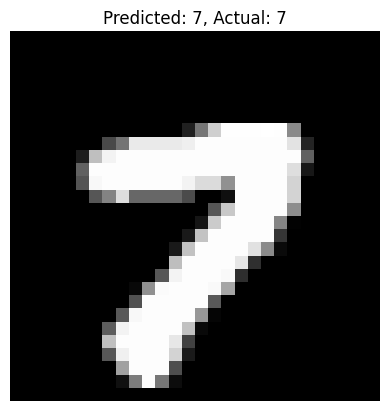

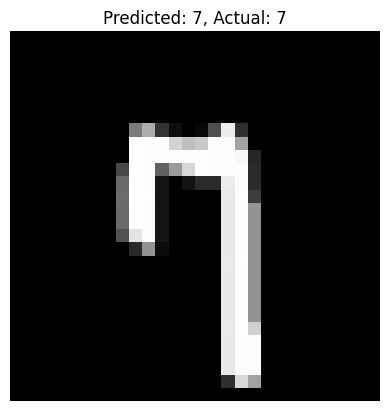

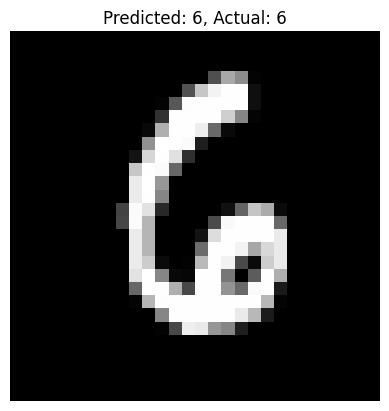

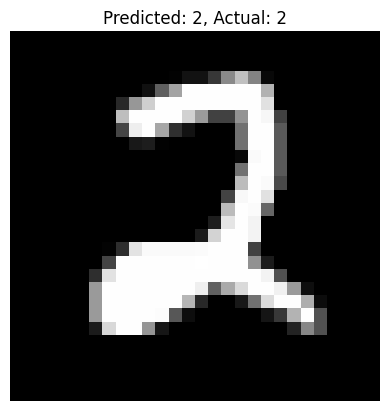

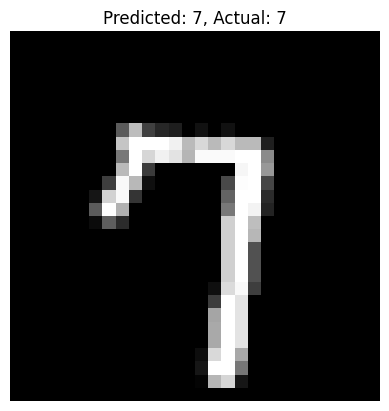

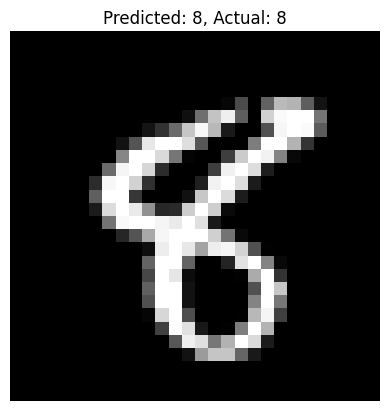

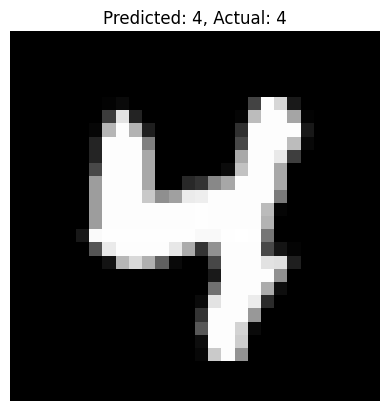

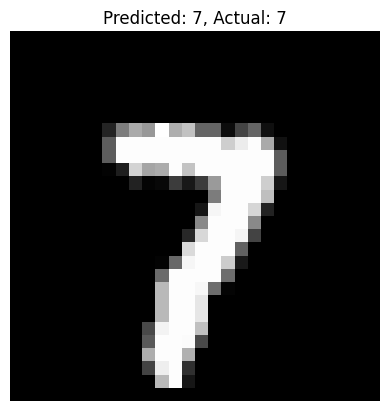

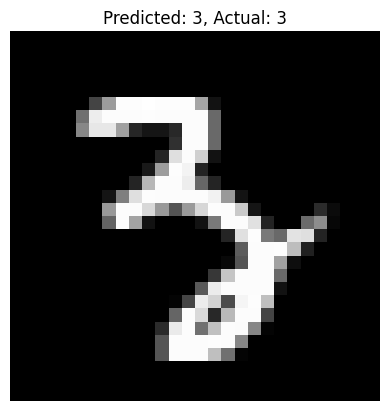

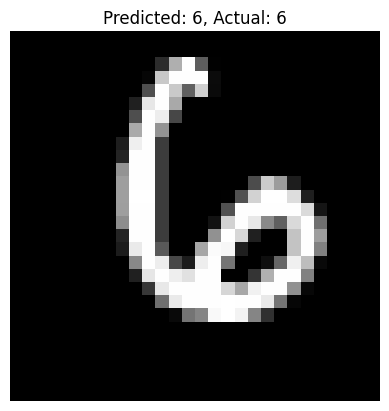

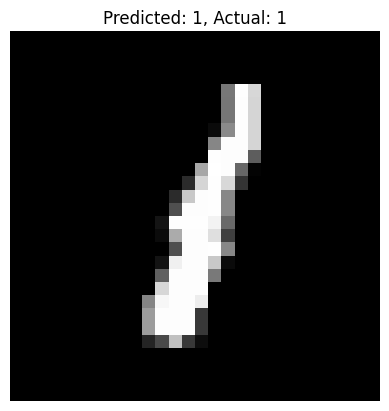

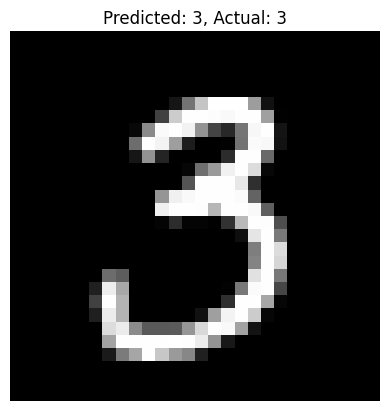

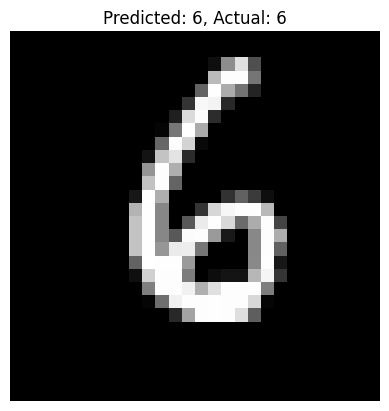

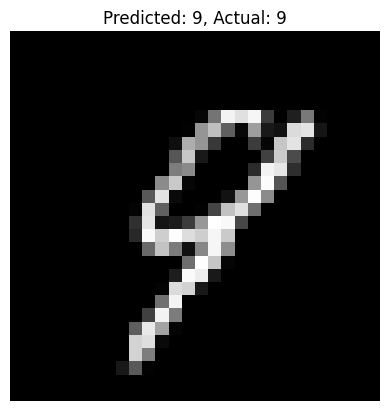

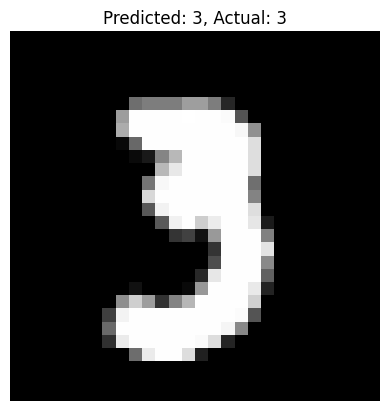

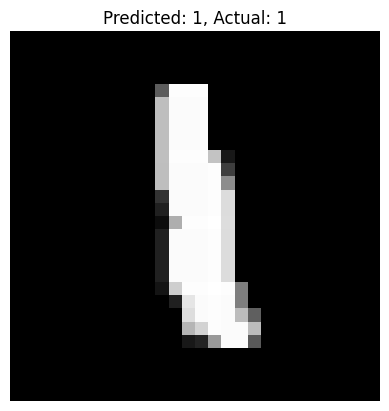

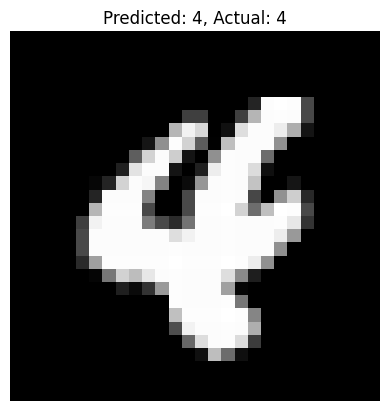

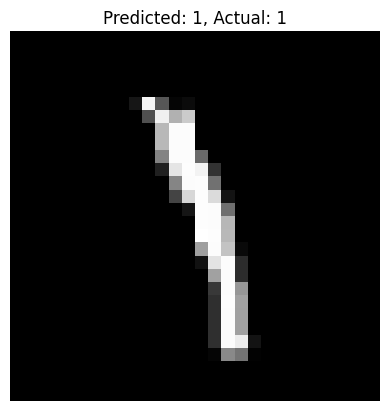

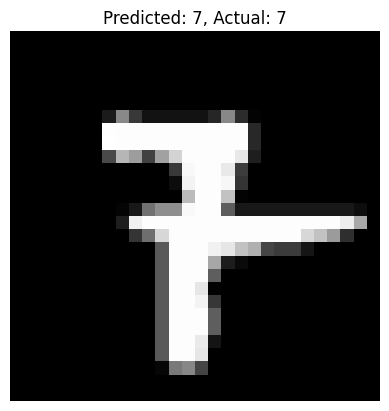

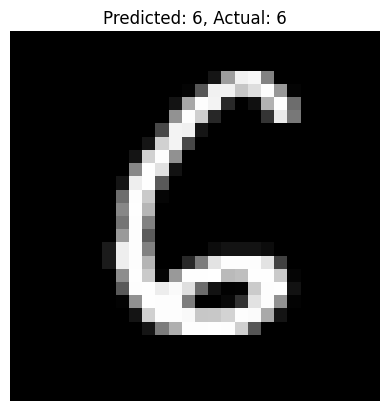

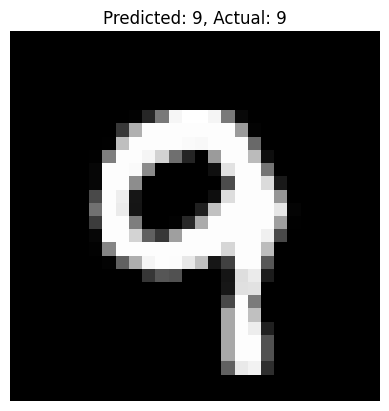

In [8]:
predictions = model.predict(X_test[:100])
for i in range(100):
    plt.imshow(X_test[i].squeeze(), cmap="gray")
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")
    plt.axis("off")
    plt.show()